In [2]:
# General + Stats
import numpy as np
import pandas as pd
from scipy.stats import linregress


# Raster or Spatial
from rasterio.plot import show
import rasterio
import geopandas as gpd
from shapely.geometry import Point

#Plot
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
import matplotlib.gridspec as gridspec


In [3]:
# Load data

In [4]:
df = pd.read_csv("../data/L1/NYC_NTA_extracted.csv").drop('Unnamed: 0', axis = 1)
df.columns

Index(['boro_code', 'boro_name', 'county_fip', 'ntacode', 'ntaname',
       'shape_area', 'shape_leng', 'geometry', 'chm_min', 'chm_max',
       'chm_mean', 'chm_median', 'chm_25_percentile', 'chm_75_percentile',
       'td_min', 'td_max', 'td_mean', 'td_median', 'td_25_percentile',
       'td_75_percentile', 'cc_min', 'cc_max', 'cc_mean', 'cc_median',
       'cc_25_percentile', 'cc_75_percentile', 'cd_min', 'cd_max', 'cd_mean',
       'cd_median', 'cd_25_percentile', 'cd_75_percentile', 'ha_min', 'ha_max',
       'ha_mean', 'ha_median', 'ha_25_percentile', 'ha_75_percentile',
       'rstab_min', 'rstab_max', 'rstab_mean', 'rstab_median',
       'rstab_25_percentile', 'rstab_75_percentile', 'sub_min', 'sub_max',
       'sub_mean', 'sub_median', 'sub_25_percentile', 'sub_75_percentile',
       'aff_min', 'aff_max', 'aff_mean', 'aff_median', 'aff_25_percentile',
       'aff_75_percentile'],
      dtype='object')

# Regression Plots

/Users/eihwood/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:1689: FutureWarning: The `vertical` parameter is deprecated and will be removed in a future version. Assign the data to the `y` variable instead.
  warnings.warn(msg, FutureWarning)


p-value: 0.0000
R-squared: 0.3054


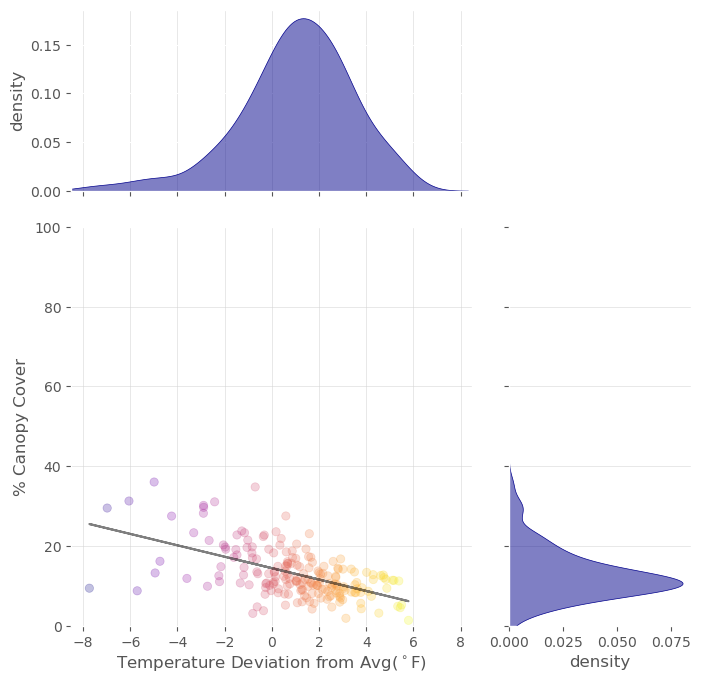

In [14]:
# Subset desireable variables, dropping NaNs
s = df[['ha_mean', 'cc_mean']].dropna()
x = s.iloc[:,0]
y = s.iloc[:,1]
z = s.iloc[:,0]
# Calculate the regression line
slope, intercept, r_value, p_value, std_err = linregress(x,y)
regression_line = np.polyval([slope, intercept], x)


fig = plt.figure(figsize=(8,8))
gs = gridspec.GridSpec(3, 3)
ax_main = plt.subplot(gs[1:3, :2])
ax_xDist = plt.subplot(gs[0, :2],sharex=ax_main)
ax_yDist = plt.subplot(gs[1:3, 2],sharey=ax_main)
    

# Turn off tick labels on marginals
plt.setp(ax_xDist.get_xticklabels(), visible=False)
plt.setp(ax_yDist.get_yticklabels(), visible=False)    

# Set Axis Lims
ax_main.set_xlim(xmin = -8.5, xmax=8.5)
ax_main.set_ylim(ymin = 0, ymax = 100)


# Scatter

ax_main.scatter(x,y, c = z, cmap = "plasma",alpha = 0.25)

# Regression
ax_main.plot(x, regression_line, color='black', alpha = 0.5)

# Plot aes
ax_main.grid(color='lightgrey', linestyle='-', linewidth=0.5, alpha=0.75, which = 'major')
ax_main.set(xlabel="Temperature Deviation from Avg($^\circ$F)", ylabel="% Canopy Cover")
ax_main.set_facecolor('none')

# Add p-value and R-squared to the plot
#ax_main.text(2.5, 40, f'p-value: {p_value:.4f}')
#ax_main.text(2.5, 35, f'R-squared: {r_value**2:.4f}')


sns.kdeplot(x, ax=ax_xDist, color='darkblue', fill = True, alpha = 0.5)
ax_xDist.set(ylabel='density')
ax_xDist.set_xlabel('')

ax_xDist.grid(color='lightgrey', linestyle='-', linewidth=0.5, alpha=0.75, which = 'major', axis = 'x')
ax_xDist.set_facecolor('none')

sns.kdeplot(y, ax=ax_yDist, color='darkblue', vertical=True, fill = True, alpha = 0.5)
ax_yDist.set(xlabel='density')
ax_yDist.set_ylabel('')

ax_yDist.grid(color='lightgrey', linestyle='-', linewidth=0.5, alpha=0.75, which = 'major', axis = 'y')
ax_yDist.set_facecolor('none')

print(f'p-value: {p_value:.4f}')
print(f'R-squared: {r_value**2:.4f}')

plt.savefig('../figs/canopycover_vs_tempanomaly_NTALevel.png', dpi = 300, bbox_inches = "tight")

/Users/eihwood/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:1689: FutureWarning: The `vertical` parameter is deprecated and will be removed in a future version. Assign the data to the `y` variable instead.
  warnings.warn(msg, FutureWarning)


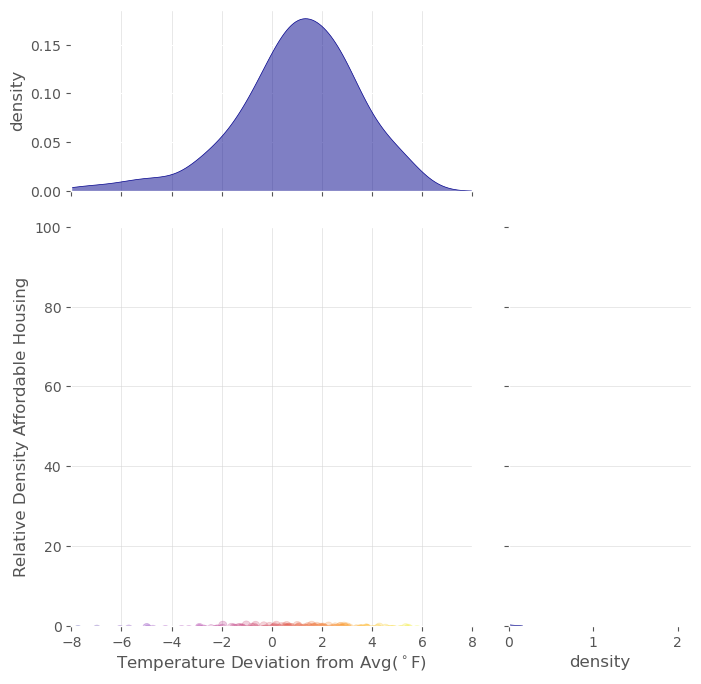

In [12]:
# Subset desireable variables, dropping NaNs
s = df[['ha_mean', 'aff_mean']].dropna()
x = s.iloc[:,0]
y = s.iloc[:,1]
z = s.iloc[:,0]
# Calculate the regression line
slope, intercept, r_value, p_value, std_err = linregress(x,y)
regression_line = np.polyval([slope, intercept], x)


fig = plt.figure(figsize=(8,8))
gs = gridspec.GridSpec(3, 3)
ax_main = plt.subplot(gs[1:3, :2])
ax_xDist = plt.subplot(gs[0, :2],sharex=ax_main)
ax_yDist = plt.subplot(gs[1:3, 2],sharey=ax_main)
    

# Turn off tick labels on marginals
plt.setp(ax_xDist.get_xticklabels(), visible=False)
plt.setp(ax_yDist.get_yticklabels(), visible=False)    


# Scatter

ax_main.scatter(x,y, c = z, cmap = "plasma",alpha = 0.25)

# Regression
ax_main.plot(x, regression_line, color='black', alpha = 0.5)

# Plot aes
ax_main.grid(color='lightgrey', linestyle='-', linewidth=0.5, alpha=0.75, which = 'major')
ax_main.set(xlabel="Temperature Deviation from Avg($^\circ$F)", ylabel="Relative Density Affordable Housing")
ax_main.set_facecolor('none')

# Add p-value and R-squared to the plot
#ax_main.text(2.5, 40, f'p-value: {p_value:.4f}')
#ax_main.text(2.5, 35, f'R-squared: {r_value**2:.4f}')


sns.kdeplot(x, ax=ax_xDist, color='darkblue', fill = True, alpha = 0.5)
ax_xDist.set(ylabel='density')
ax_xDist.set_xlabel('')

ax_xDist.grid(color='lightgrey', linestyle='-', linewidth=0.5, alpha=0.75, which = 'major', axis = 'x')
ax_xDist.set_facecolor('none')

sns.kdeplot(y, ax=ax_yDist, color='darkblue', vertical=True, fill = True, alpha = 0.5)
ax_yDist.set(xlabel='density')
ax_yDist.set_ylabel('')

ax_yDist.grid(color='lightgrey', linestyle='-', linewidth=0.5, alpha=0.75, which = 'major', axis = 'y')
ax_yDist.set_facecolor('none')



plt.savefig('../figs/affordablehousingdensity_vs_tempanomaly_NTALevel.png', dpi = 300, bbox_inches = "tight")

In [33]:
df.columns

Index(['boro_code', 'boro_name', 'county_fip', 'ntacode', 'ntaname',
       'shape_area', 'shape_leng', 'geometry', 'chm_min', 'chm_max',
       'chm_mean', 'chm_median', 'chm_25_percentile', 'chm_75_percentile',
       'td_min', 'td_max', 'td_mean', 'td_median', 'td_25_percentile',
       'td_75_percentile', 'cc_min', 'cc_max', 'cc_mean', 'cc_median',
       'cc_25_percentile', 'cc_75_percentile', 'cd_min', 'cd_max', 'cd_mean',
       'cd_median', 'cd_25_percentile', 'cd_75_percentile', 'ha_min', 'ha_max',
       'ha_mean', 'ha_median', 'ha_25_percentile', 'ha_75_percentile',
       'rstab_min', 'rstab_max', 'rstab_mean', 'rstab_median',
       'rstab_25_percentile', 'rstab_75_percentile', 'sub_min', 'sub_max',
       'sub_mean', 'sub_median', 'sub_25_percentile', 'sub_75_percentile',
       'aff_min', 'aff_max', 'aff_mean', 'aff_median', 'aff_25_percentile',
       'aff_75_percentile'],
      dtype='object')

p-value: 0.0000
R-squared: 0.2082


/Users/eihwood/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:1689: FutureWarning: The `vertical` parameter is deprecated and will be removed in a future version. Assign the data to the `y` variable instead.
  warnings.warn(msg, FutureWarning)


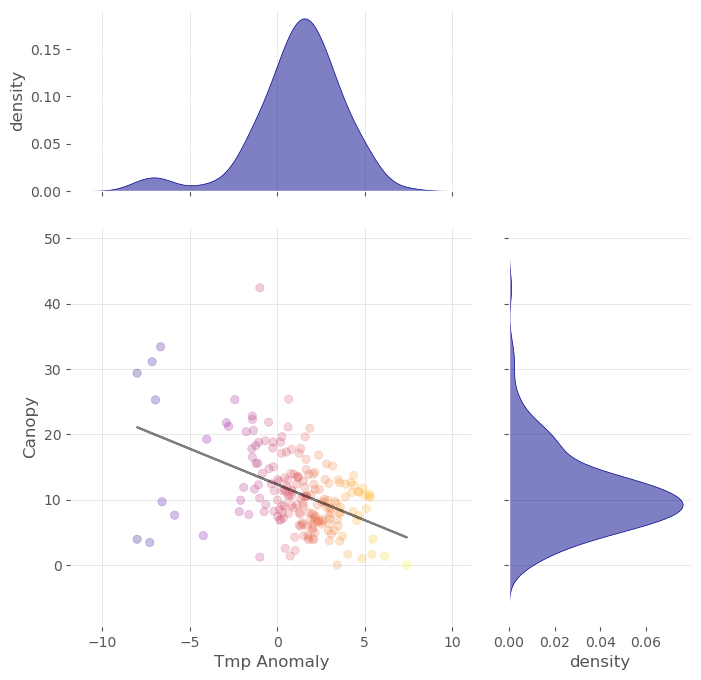

In [11]:
# Subset desireable variables, dropping NaNs
s = df[['ha_median', 'cc_median', 'ha_median']].dropna()
x = s.iloc[:,0]
y = s.iloc[:,1]
z = s.iloc[:,2]

xl = "Tmp Anomaly"
yl = "Canopy"
# Calculate the regression line
slope, intercept, r_value, p_value, std_err = linregress(x,y)
regression_line = np.polyval([slope, intercept], x)


fig = plt.figure(figsize=(8,8))
gs = gridspec.GridSpec(3, 3)
ax_main = plt.subplot(gs[1:3, :2])
ax_xDist = plt.subplot(gs[0, :2],sharex=ax_main)
ax_yDist = plt.subplot(gs[1:3, 2],sharey=ax_main)
    

# Turn off tick labels on marginals
plt.setp(ax_xDist.get_xticklabels(), visible=False)
plt.setp(ax_yDist.get_yticklabels(), visible=False)    
    

# Scatter

ax_main.scatter(x,y, c = z, cmap = "plasma",alpha = 0.25)

# Regression
ax_main.plot(x, regression_line, color='black', alpha = 0.5)

# Plot aes
ax_main.grid(color='lightgrey', linestyle='-', linewidth=0.5, alpha=0.75, which = 'major')
ax_main.set(xlabel=xl, ylabel=yl)
ax_main.set_facecolor('none')

# Add p-value and R-squared to the plot
#ax_main.text(2.5, 40, f'p-value: {p_value:.4f}')
#ax_main.text(2.5, 35, f'R-squared: {r_value**2:.4f}')


sns.kdeplot(x, ax=ax_xDist, color='darkblue', fill = True, alpha = 0.5)
ax_xDist.set(ylabel='density')
ax_xDist.set_xlabel('')

ax_xDist.grid(color='lightgrey', linestyle='-', linewidth=0.5, alpha=0.75, which = 'major', axis = 'x')
ax_xDist.set_facecolor('none')

sns.kdeplot(y, ax=ax_yDist, color='darkblue', vertical=True, fill = True, alpha = 0.5)
ax_yDist.set(xlabel='density')
ax_yDist.set_ylabel('')

ax_yDist.grid(color='lightgrey', linestyle='-', linewidth=0.5, alpha=0.75, which = 'major', axis = 'y')
ax_yDist.set_facecolor('none')

print(f'p-value: {p_value:.4f}')
print(f'R-squared: {r_value**2:.4f}')
#plt.savefig('../figs/affordablehousingdensity_vs_tempanomaly_NTALevel.png', dpi = 300, bbox_inches = "tight")